# Importing all the essential libraries


In [ ]:
#importing all the essential libraries required for building the project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the required Dataset

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df= pd.read_csv(url)

**Data Description to view the detailed distribution of data** 

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Reading the values from dataframe and Plotting the values

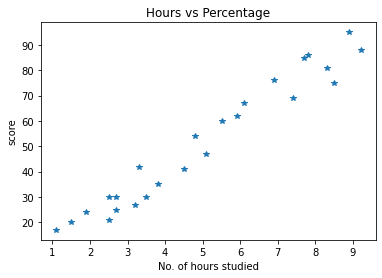

In [25]:
#Reading values from X and Y from the given dataframe
X = df["Hours"]
Y = df["Scores"]

#plotting the given dataset
plt.plot(X,Y,'*')
plt.title("Hours vs Percentage")
plt.xlabel("No. of hours studied")
plt.ylabel("score")
plt.show()

# Correlation between data

In [6]:
df.corr(method="pearson"),df.corr(method="spearman")

(           Hours    Scores
 Hours   1.000000  0.976191
 Scores  0.976191  1.000000,
            Hours    Scores
 Hours   1.000000  0.971891
 Scores  0.971891  1.000000)

# Using seaborn to plot data

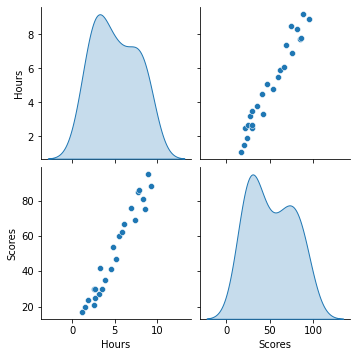

In [7]:
sns.pairplot(df,diag_kind='kde')



In [8]:
#Preparartion of data
X=df.iloc[:, :-1].values
Y=df.iloc[:, 1].values

In [9]:
#splitting the dataset into two parts one fot traing the model and the other for testing it
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Training the model

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

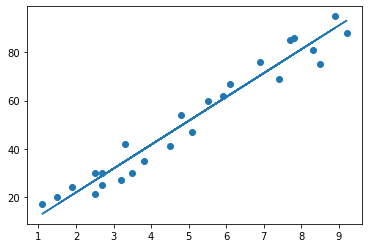

In [11]:
#fitting the linear regression model on the given plot of data
fit= regressor.coef_*X+regressor.intercept_

#Plottig for the test data
plt.scatter(X,Y)
plt.plot(X, fit)
plt.show()

In [12]:
print(X_test)
Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Prediction of Score

In [26]:
#prediction  of score if student studies for 7.4 hours a day
hours = 7.4
h1 = np.array([hours])
h1 = h1.reshape(-1,1)
own_pred = regressor.predict(h1)
print("Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Hours = 7.4
Predicted Score = 75.35701799818725


# Model Evaluation

In [24]:
#model evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error: 4.183859899002982
